In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

## 1. Pre-Processing 

In [2]:
dir = "input/handwritten-characters/Train/"
train_data = []
img_size = 32
for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
len(train_data)

112000

In [4]:
val_dir = "input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

28000

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

## 2. Segmentation

In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [8]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [9]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [10]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [11]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [12]:
print(train_X.shape,val_X.shape)

(112000, 32, 32, 1) (28000, 32, 32, 1)


In [13]:
print(train_Y.shape,val_Y.shape)

(112000, 35) (28000, 35)


In [14]:
# image_index = 0
# print(train_Y[image_index])
# plt.imshow(train_X[image_index])

## 3. Feature Extraction

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [17]:
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

## 4. Classification & Recognition (Training)

In [18]:
history = model.fit(train_X, train_Y, batch_size=64, epochs=50, validation_data=(val_X, val_Y), verbose=1)

Epoch 1/50
1750/1750 [==============================] - 54s 28ms/step - loss: 0.6184 - accuracy: 0.8033 - val_loss: 0.4277 - val_accuracy: 0.8543
Epoch 2/50
1750/1750 [==============================] - 48s 27ms/step - loss: 0.3062 - accuracy: 0.8932 - val_loss: 0.4233 - val_accuracy: 0.8664
Epoch 3/50
1750/1750 [==============================] - 47s 27ms/step - loss: 0.2632 - accuracy: 0.9050 - val_loss: 0.4009 - val_accuracy: 0.8750
Epoch 4/50
1750/1750 [==============================] - 48s 27ms/step - loss: 0.2359 - accuracy: 0.9130 - val_loss: 0.3845 - val_accuracy: 0.8818
Epoch 5/50
1750/1750 [==============================] - 48s 27ms/step - loss: 0.2196 - accuracy: 0.9178 - val_loss: 0.3920 - val_accuracy: 0.8800
Epoch 6/50
1750/1750 [==============================] - 49s 28ms/step - loss: 0.2064 - accuracy: 0.9229 - val_loss: 0.3915 - val_accuracy: 0.8844
Epoch 7/50
1750/1750 [==============================] - 48s 28ms/step - loss: 0.1965 - accuracy: 0.9255 - val_loss: 0.3943 -

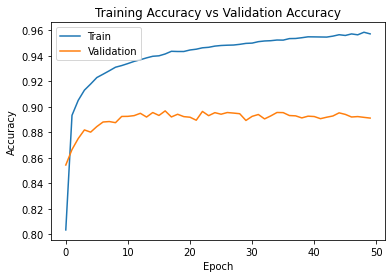

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

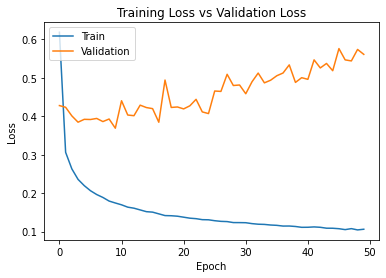

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 5. Testing (Post-Processing) 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [21]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [22]:
def get_letters(img):
    letters = []
    total_bbox_cordi = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            print([x,y,w,h])
            single_bbox_cordi = [x,y,w,h]
            total_bbox_cordi.append(single_bbox_cordi)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image, total_bbox_cordi



In [23]:
def get_word(letter):
    word = "".join(letter)
    return word

[35, 34, 66, 131]
1/1 [==============================] - 0s 483ms/step
[119, 49, 57, 92]
1/1 [==============================] - 0s 31ms/step
[203, 50, 54, 84]
1/1 [==============================] - 0s 32ms/step
[253, 35, 88, 104]
1/1 [==============================] - 0s 33ms/step
[339, 41, 56, 94]
1/1 [==============================] - 0s 31ms/step
[415, 42, 85, 97]
1/1 [==============================] - 0s 28ms/step
[[35, 34, 66, 131], [119, 49, 57, 92], [203, 50, 54, 84], [253, 35, 88, 104], [339, 41, 56, 94], [415, 42, 85, 97]]
BUATAN


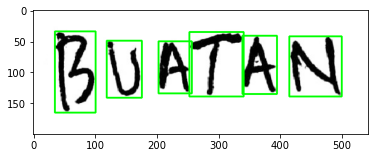

In [24]:
letter,image, total_bbox_cordi = get_letters("input/handwritten-characters/Test/test_2.jpg")
word = get_word(letter)
print(total_bbox_cordi)
plt.imshow(image)
print(word)

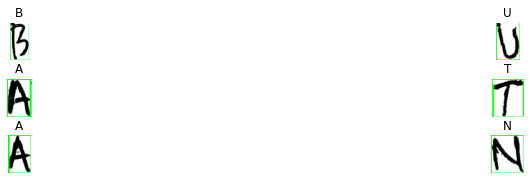

In [25]:
plt.figure(figsize=(15, 10))
for i in range(0,len(total_bbox_cordi)):
    ax = plt.subplot(10, 2, i+1)
    t =total_bbox_cordi[i]
    x_min = t[0]
    y_min = t[1]
    w_min = t[2]
    h_min= t[3]
    cropped_image = image[y_min:y_min+h_min, x_min:x_min+w_min]
    plt.title(letter[i], fontsize=12)
    plt.imshow(cropped_image)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.5)

In [26]:
model.save('hcr.h5')